Let's perform a hypothesis test for a known population mean. We'll use a z-test for this example. Assume you have a sample and want to test if its mean is significantly different from a known population mean. We'll use matplotlib to visualize the results.

#### Hypothesis Testing Steps (One-Sample)

1. **Define the Null and Alternative Hypothesis (H0):** This is the hypothesis that there is no significant difference or effect. It often includes an equal sign (=).

2. **Choose the Significance Level (α):** This is the probability of rejecting the null hypothesis when it is true. Common choices are 0.05, 0.01, or 0.10.
   - the significance level (α) represents the probability of making a Type I error, which is the probability of rejecting a true null hypothesis.
   - It is explicitly chosen by the researcher before conducting the test. Common choices are 0.05, 0.01, etc.

3. **Collect and Analyze Data:**
   - Collect a sample of data relevant to the hypothesis.
   - Summarize the data using appropriate descriptive statistics (mean, standard deviation, etc.).
   - Choose the Appropriate Test Statistic, For a one-sample test, if you know the population standard deviation, you might use a z-test. If not, a t-test is more common.


4. **Compute the Test Statistic:**
   - Use the sample data to calculate the test statistic.

5. **Determine the Critical Region or Critical Value:**
   - Based on the chosen significance level (α), determine the critical region (the range of values that would lead to rejecting the null hypothesis).
   - The critical value is used to define the rejection region(s) in a hypothesis test.
   - It represents the boundary beyond which you would reject the null hypothesis.
   - For a two-tailed test with a significance level of α, it corresponds to the z-score that leaves α/2 in the upper tail and α/2 in the lower tail of the standard normal distribution.

6. **Test Statistic (z-statistics)::**
    - The test statistic is calculated from the sample data and is used to determine how far the sample result is from the null hypothesis.
    - It provides a standardized measure of how many standard deviations the sample mean is from the population mean under the null hypothesis.
    - It is used to make a decision about whether to reject the null hypothesis based on a comparison with the critical value.
7. **Draw a Conclusion:**
    - Based on the decision in step 8, conclude whether there is enough evidence to reject the null hypothesis or not.

**Note:** The steps may vary slightly based on the specific hypothesis test being used (z-test, t-test, etc.) and the characteristics of the data.


In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [ ]:
# Steps in doing hypothesis test (one-sample z-test):

# 1. State alternative hypothesis (and null)
#   * example: sample mean is greater than population mean (mu)
# 2. Specify significance level (alpha)
#   * alpha is the probability of rejecting null even though its true (!)
# 3. Calculate test statistic (z-statistic)
#   * $z = \frac{\bar{x}-\mu}{\sigma}$
# 4. Calculate p-value
#   * p = 1 - CDF(z-stat)
#   * Probability we'd find this value given null is true
#     - `1 - scipy.stats.norm.cdf(z_score)`
# 5. Interpret p-value

sample_mean = 112.5
population_mean = 100
population_std_dev = 15
sample_size = 30
alpha = 0.05
critical_value = norm.ppf(1 - alpha)

z_score = (sample_mean - population_mean) / (population_std_dev / np.sqrt(sample_size))

if z_score > critical_value:
    print("Reject the null hypothesis")
else:
    print("Cannot reject the null hypothesis")

In [ ]:
def n(n:int):
  return n== 1

Critical value: 1.9600
Test Statistic (z): 0.1529
P-value: 0.8785
Decision: Fail to reject the null hypothesis


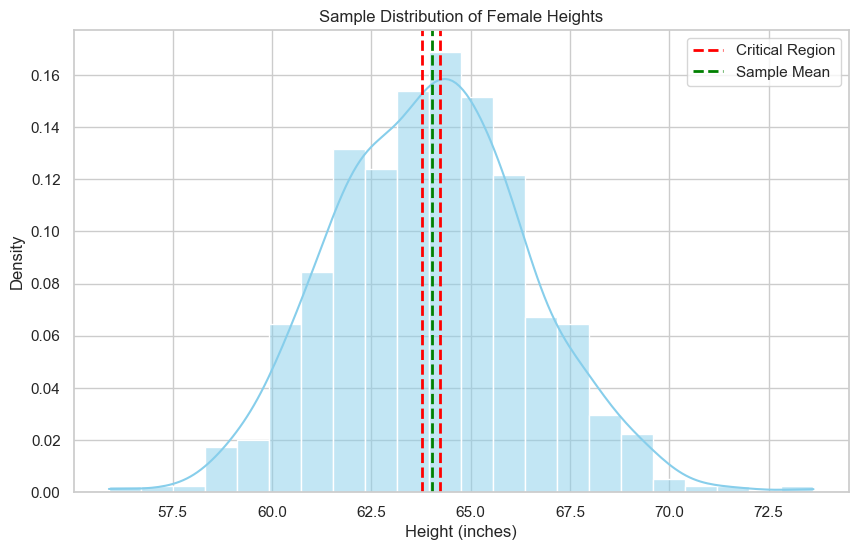

In [66]:
# Set seed for reproducibility
np.random.seed(42)

# Population parameters for female height
population_mean = 64
population_std = 2.5

# Step 1: Define null and alternative hypotheses
null_hypothesis_mean = 64

# Step 2: Choose significance level
alpha = 0.05 # significance level = ( 1 - confidence_interval 0.95 )

# Step 3: Collect a sample of data
sample_size = 500
female_heights = stats.norm.rvs(loc=population_mean, scale=population_std, size=sample_size)

# Step 4: Compute test statistic
sample_mean = np.mean(female_heights)
sample_std = np.std(female_heights, ddof=1)  # Use ddof=1 for sample standard deviation

critical_value = stats.norm.ppf(1 - alpha / 2)  # Use ppf for inverse CDF
print(f"Critical value: {critical_value:.4f}")

z_statistics = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistics)))  # Multiply by 2 for a two-tailed test

if p_value < alpha:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

print(f"Test Statistic (z): {z_statistics:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {decision}")

sns.set(style="whitegrid")

# Plot the sample distribution
plt.figure(figsize=(10, 6))
sns.histplot(female_heights, kde=True, color='skyblue', stat='density')
plt.title('Sample Distribution of Female Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Density')

# Highlight the critical region
lower_bound = population_mean - critical_value * (population_std / np.sqrt(sample_size))
upper_bound = population_mean + critical_value * (population_std / np.sqrt(sample_size))
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Critical Region')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)

# Highlight the sample mean
plt.axvline(sample_mean, color='green', linestyle='dashed', linewidth=2, label='Sample Mean')

plt.legend()
plt.show()

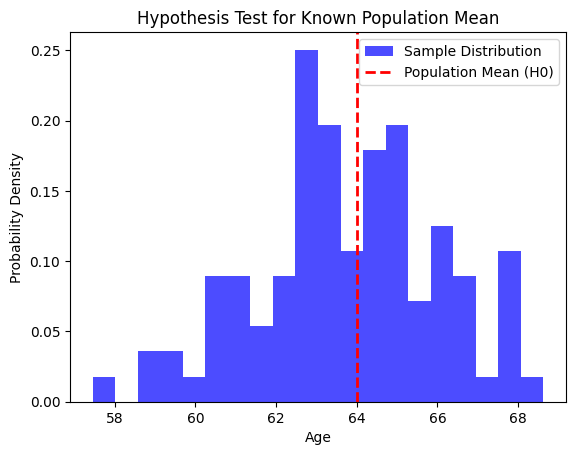

Z-statistic: -1.1435
P-value: 0.2528
Null Hypothesis Rejected: False


In [40]:

# Set seed for reproducibility
np.random.seed(42)

# Known population parameters
population_mean = 64
population_std  = 2.5


# Generate sample data
sample_size = 100
sample_ages = np.random.normal(population_mean, population_std, sample_size)

# Set the null hypothesis (H0) - Let's say the population mean is 30
null_hypothesis_mean = 64

# Perform one-sample z-test
z_stat, p_value = ztest(sample_ages, value=null_hypothesis_mean)

# Set significance level (alpha)
alpha = 0.05

# Check if the null hypothesis can be rejected
reject_null_hypothesis = p_value < alpha

# Plot the sample distribution and the null hypothesis mean
plt.hist(sample_ages, bins=20, density=True, alpha=0.7, color='blue', label='Sample Distribution')

plt.axvline(null_hypothesis_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean (H0)')

# Set labels and legend
plt.title('Hypothesis Test for Known Population Mean')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

# Display the results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Null Hypothesis Rejected: {reject_null_hypothesis}")
